In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np

data = pd.read_csv("../raw_data/stock_prices_latest.csv",parse_dates = True)

In [2]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
dataR= data[(data.symbol=="JPM")]

dataR= dataMVA[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#dataMVA= dataMVA[(dataMVA.date.dt.year > 2015 ) & (dataMVA.date.dt.year < 2021)]

dataR.sort_values(by=["date"], inplace=True)
dataR = dataR.assign(MVA5 = "",Returns = "")

dataR

<ipython-input-14-8fed59773435>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataR= dataMVA[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]


,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,MVA5,Returns
12068053,JPM,2017-01-03,87.34,87.7600,85.9800,87.23,84.8665,20550714,1.0,,
12067260,JPM,2017-01-04,86.96,87.1800,86.4000,86.91,85.0222,15265665,1.0,,
12066088,JPM,2017-01-05,86.81,87.1100,85.2589,86.11,84.2396,14300638,1.0,,
12067396,JPM,2017-01-06,86.39,86.6200,85.9400,86.12,84.2494,12893298,1.0,,
12069250,JPM,2017-01-09,85.73,86.7700,85.5200,86.18,84.3081,12795648,1.0,,
...,...,...,...,...,...,...,...,...,...,...,...
18746383,JPM,2018-12-24,92.89,94.2200,92.1400,92.14,91.3871,17009280,1.0,,
18746505,JPM,2018-12-26,92.69,95.9600,91.1100,95.96,95.1759,22542900,1.0,,
18746510,JPM,2018-12-27,94.82,97.1500,93.5500,97.04,96.2471,20304683,1.0,,
18746623,JPM,2018-12-28,97.95,98.3200,96.4400,96.83,96.0388,17963271,1.0,,


In [19]:
dataR['Returns'] = (dataR.open - dataR.open.shift(1))/dataR.open.shift(1)

In [20]:
dataR

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,MVA5,Returns
12068053,JPM,2017-01-03,87.34,87.7600,85.9800,87.23,84.8665,20550714,1.0,,NaN
12067260,JPM,2017-01-04,86.96,87.1800,86.4000,86.91,85.0222,15265665,1.0,,-0.004351
12066088,JPM,2017-01-05,86.81,87.1100,85.2589,86.11,84.2396,14300638,1.0,,-0.001725
12067396,JPM,2017-01-06,86.39,86.6200,85.9400,86.12,84.2494,12893298,1.0,,-0.004838
12069250,JPM,2017-01-09,85.73,86.7700,85.5200,86.18,84.3081,12795648,1.0,,-0.007640
...,...,...,...,...,...,...,...,...,...,...,...
18746383,JPM,2018-12-24,92.89,94.2200,92.1400,92.14,91.3871,17009280,1.0,,-0.039201
18746505,JPM,2018-12-26,92.69,95.9600,91.1100,95.96,95.1759,22542900,1.0,,-0.002153
18746510,JPM,2018-12-27,94.82,97.1500,93.5500,97.04,96.2471,20304683,1.0,,0.022980
18746623,JPM,2018-12-28,97.95,98.3200,96.4400,96.83,96.0388,17963271,1.0,,0.033010


In [21]:
dataR = dataR[["date", "Returns"]].copy()  #à verifier, si il faut garder le .copy() ou pas
dataR.rename(columns={"date": "ds", "Returns": "y"}, inplace=True)
dataR

,ds,y
12068053,2017-01-03,NaN
12067260,2017-01-04,-0.004351
12066088,2017-01-05,-0.001725
12067396,2017-01-06,-0.004838
12069250,2017-01-09,-0.007640
...,...,...
18746383,2018-12-24,-0.039201
18746505,2018-12-26,-0.002153
18746510,2018-12-27,0.022980
18746623,2018-12-28,0.033010


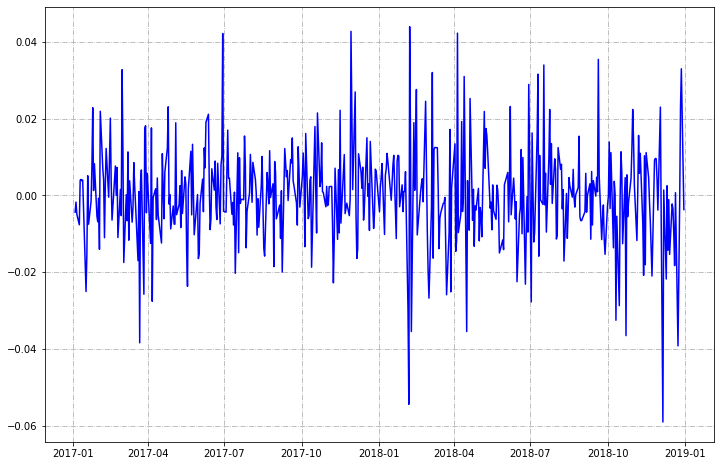

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(dataR['ds'], dataR['y'], 'b')
plt.show()

In [23]:
index=round(len(dataR)*80/100)
index

402

In [27]:
train = dataR.iloc[:index]
test = dataR.iloc[index:]

In [28]:
train.shape, test.shape

((402, 2), (100, 2))

In [29]:
train

,ds,y
12068053,2017-01-03,NaN
12067260,2017-01-04,-0.004351
12066088,2017-01-05,-0.001725
12067396,2017-01-06,-0.004838
12069250,2017-01-09,-0.007640
...,...,...
18034619,2018-08-01,-0.011360
18034691,2018-08-02,-0.010194
18034648,2018-08-03,0.012481
18034705,2018-08-06,0.006810


In [30]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
433,2021-04-01,0.003746,-0.021649,0.027875
434,2021-05-01,0.003791,-0.022525,0.025986
435,2021-06-01,0.003947,-0.020806,0.027659
436,2021-07-01,0.003953,-0.019198,0.027468
437,2021-08-01,0.003999,-0.020252,0.028078


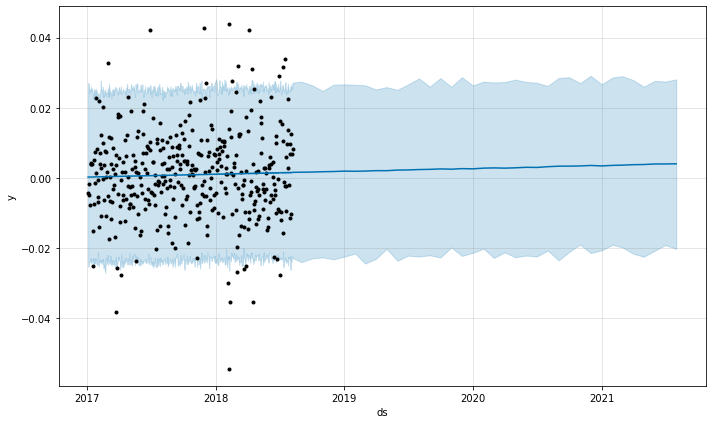

In [32]:
ax = model.plot(forecast);

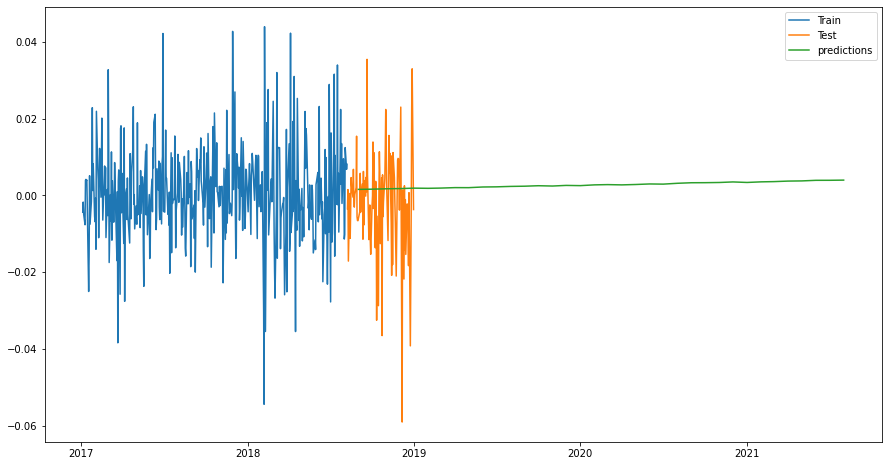

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [34]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 3 forecasts with cutoffs between 2017-07-08 00:00:00 and 2018-07-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [35]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-07-10,0.003520,-0.018188,0.026130,-0.004896,2017-07-08
1,2017-07-11,0.003559,-0.017490,0.025125,-0.001818,2017-07-08
2,2017-07-12,0.003519,-0.020873,0.025921,-0.007715,2017-07-08
3,2017-07-13,0.003596,-0.020693,0.027610,0.000864,2017-07-08
4,2017-07-14,0.003613,-0.019452,0.026829,-0.020283,2017-07-08
...,...,...,...,...,...,...
68,2018-08-01,0.000488,-0.024770,0.024470,-0.011360,2018-07-03
69,2018-08-02,0.000505,-0.025872,0.024264,-0.010194,2018-07-03
70,2018-08-03,0.000478,-0.022574,0.025119,0.012481,2018-07-03
71,2018-08-06,0.000502,-0.023610,0.024076,0.006810,2018-07-03


In [36]:
dataR_p = performance_metrics(cv_results)
dataR_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,0.000098,0.009901,0.009502,1.455913,1.247893,1.874542,1.000000
1,5 days,0.000079,0.008871,0.007946,1.685953,1.247893,1.711211,1.000000
2,6 days,0.000160,0.012629,0.010409,1.316482,1.178127,1.546863,0.857143
3,7 days,0.000267,0.016348,0.012662,1.182534,0.966949,1.435762,0.714286
4,8 days,0.000309,0.017579,0.015116,0.904244,0.966949,1.603206,0.714286
5,9 days,0.000253,0.015917,0.013458,0.867803,0.782447,1.541652,0.809524
6,10 days,0.000191,0.013809,0.011464,0.992101,0.984000,1.651985,0.928571
7,11 days,0.000122,0.011027,0.009498,0.954226,0.951103,1.549616,1.000000
8,12 days,0.000085,0.009192,0.007615,1.529535,1.254845,1.670961,1.000000
9,13 days,0.000042,0.006488,0.004931,2.022956,1.432364,1.604811,1.000000


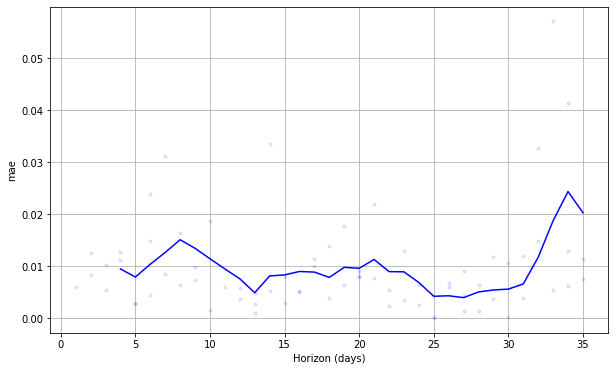

In [37]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');